# Regression Neural Network Example

* You should spend about 40 minutes on this exercise.

* In this example we're going to train a small NN to solve a very simple regression task. We will generate the data synthetically using

 $y = x \sin(2x) + \epsilon$, where $\epsilon \sim \mathcal{N}(0,0.3^2)$

* $x$ is our input, and we're predicting $y$. We don't really care what they represent.

* In this example, $x$ is univariate, i.e. it only has one feature. This means we can visualise it completely.

* We are using Keras, an easy to use API for creating and training NNs. It sits on top of Tensorflow.

* Try to run the below code. Either click on the start arrow at the top of each block of code, or to run it all, choose from the menu, Runtime>Run all. Several lines in the code are incomplete (denoted by `###...`). Follow the instructions to complete these.

* There are questions at the end for you to investigate.


In [0]:
import tensorflow.keras as keras # note that this is upgrading to v2 soon...
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import numpy as np

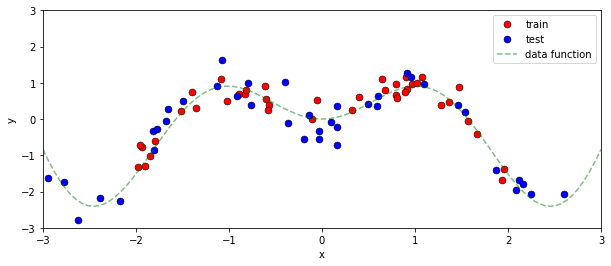

In [0]:
def data_function(X,is_noise=True):
  return X * np.sin(X*2) + is_noise*np.random.normal(loc=0,scale=0.3,size=X.shape)

# create some data
n_data = 40 # how many training data points to use

np.random.seed(404)
x_train = np.atleast_2d(np.random.uniform(-2,2,n_data)).T
y_train = data_function(x_train)

x_test = np.atleast_2d(np.random.uniform(-3,3,40)).T
y_test = data_function(x_test)

# create a grid of data so we can visualise over the entire range
x_grid = np.atleast_2d(np.linspace(-3, 3, 100)).T

fig = plt.figure(figsize=(10, 4))
ax = fig.add_subplot(111)
ax.plot(x_train[:,0], y_train, 'r.', markersize=14,markeredgecolor='k',markeredgewidth=0.5, label='train')
ax.plot(x_test[:,0], y_test, 'b.', markersize=14,markeredgecolor='k',markeredgewidth=0.5, label='test')
ax.plot(x_grid,data_function(x_grid,is_noise=False), 'g--', label='data function',alpha=0.5)
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)
ax.legend()
ax.set_ylabel('y')
ax.set_xlabel('x')
fig.show()

In [0]:
n_hidden = 100 # how many hidden nodes in the NN?
activation_in = 'relu'
l_rate = 0.001

# create a neural network with one hidden layer
NN = Sequential()
NN.add(Dense(n_hidden, input_shape=(1,),activation=activation_in))
NN.add(Dense(n_hidden, input_shape=(1,),activation=activation_in))
NN.add(Dense(1, activation='linear'))

################################################################################
# look at https://keras.io/losses/ to choose an appropriate loss
# NN.compile(loss='...',optimizer=keras.optimizers.Adam(lr=l_rate))
NN.compile(loss='mean_squared_error',optimizer=keras.optimizers.Adam(lr=l_rate))
################################################################################

print(NN.summary())

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 100)               200       
_________________________________________________________________
dense_15 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 101       
Total params: 10,401
Trainable params: 10,401
Non-trainable params: 0
_________________________________________________________________
None


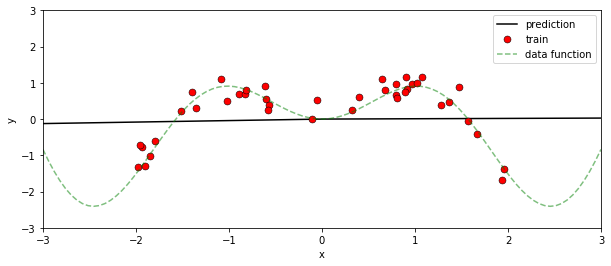

In [0]:
# plot what the NN predictions look like before training
y_preds = NN.predict(x_grid) # make predictions with the NN

fig = plt.figure(figsize=(10, 4))
ax = fig.add_subplot(111)
ax.plot(x_grid, y_preds, 'k',label='prediction')
ax.plot(x_train[:,0], y_train, 'r.', markersize=14,markeredgecolor='k',markeredgewidth=0.5, label='train')
ax.plot(x_grid,data_function(x_grid,is_noise=False), 'g--', label='data function',alpha=0.5)
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)
ax.legend()
ax.set_ylabel('y')
ax.set_xlabel('x')
fig.show()

In [0]:
# now train the NN
n_epochs = 50 # how many times to cycle through the data

hist = NN.fit(x_train, y_train,
			  batch_size=1,
			  epochs=n_epochs,
        validation_data=(x_test,y_test),
			  verbose=1)

Train on 40 samples, validate on 40 samples
Epoch 1/50
40/40 [==============================] - 0s 11ms/sample - loss: 0.6922 - val_loss: 1.5312
Epoch 2/50
40/40 [==============================] - 0s 3ms/sample - loss: 0.7205 - val_loss: 1.6459
Epoch 3/50
40/40 [==============================] - 0s 3ms/sample - loss: 0.6027 - val_loss: 1.4149
Epoch 4/50
40/40 [==============================] - 0s 3ms/sample - loss: 0.5939 - val_loss: 1.4174
Epoch 5/50
40/40 [==============================] - 0s 3ms/sample - loss: 0.5129 - val_loss: 1.2027
Epoch 6/50
40/40 [==============================] - 0s 3ms/sample - loss: 0.5044 - val_loss: 1.1630
Epoch 7/50
40/40 [==============================] - 0s 3ms/sample - loss: 0.4656 - val_loss: 1.1674
Epoch 8/50
40/40 [==============================] - 0s 3ms/sample - loss: 0.4193 - val_loss: 0.9255
Epoch 9/50
40/40 [==============================] - 0s 3ms/sample - loss: 0.3476 - val_loss: 0.9037
Epoch 10/50
40/40 [==============================] - 0s

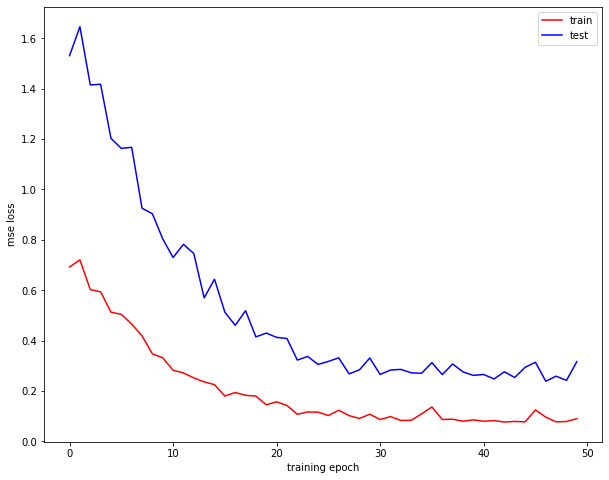

In [0]:
# check how training looked
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
ax.plot(hist.history['loss'], color='r',label='train')
ax.plot(hist.history['val_loss'], color='b',label='test')
ax.legend()
ax.set_ylabel('mse loss')
ax.set_xlabel('training epoch')
fig.show()

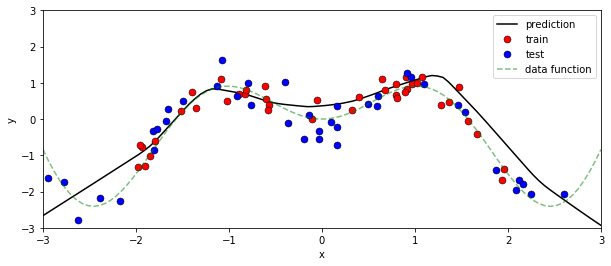

In [0]:

################################################################################
# plot a graph of what the NN predictions look like after training
# use the previous plot as guidance
# add in the test data too

# fig = plt.figure(figsize=(10, 4))
# ax = fig.add_subplot(111)
# ...
# fig.show()

y_preds = NN.predict(x_grid) # make predictions with the NN

fig = plt.figure(figsize=(10, 4))
ax = fig.add_subplot(111)
ax.plot(x_grid, y_preds, 'k',label='prediction')
ax.plot(x_train[:,0], y_train, 'r.', markersize=14,markeredgecolor='k',markeredgewidth=0.5, label='train')
ax.plot(x_test[:,0], y_test, 'b.', markersize=14,markeredgecolor='k',markeredgewidth=0.5, label='test')
ax.plot(x_grid,data_function(x_grid,is_noise=False), 'g--', label='data function',alpha=0.5)
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)
ax.legend()
ax.set_ylabel('y')
ax.set_xlabel('x')
fig.show()
################################################################################

In [0]:
# we'll now evaluate the model
# recompute the mean squared error
y_test_pred = NN.predict(x_test)

################################################################################
# complete this section to calculate mean squared error yourself
# mse_manual = ...
mse_manual = np.square(y_test_pred - y_test).mean()
################################################################################

# check that it matches the mse that's automatically calculated
mse_automatic = NN.evaluate(x_test,y_test)

print('manual mse calc:', round(mse_manual,4))
print('automatic mse calc:', round(mse_automatic,4))

40/40 [==============================] - 0s 144us/sample - loss: 0.3169
manual mse calc: 0.3169
automatic mse calc: 0.3169


In [0]:
test_data_point = np.array([1.0])
y_pred_automatic = NN.predict(test_data_point)

################################################################################
# complete this section to manually calculate the predicted value at the test_data_point
# do this for a single layer NN, with 3 hidden nodes
# hint: sketch out the NN structure to remind yourself how it works
# use print(w1.shape) etc to understand how the parameters are structured
# look for what non-linearity (activation function) is used
# your code will need to match that
# 
# if you can, generalise your code so it works with any number of hidden nodes
# (you'll need to use matrix multiplications - np.matmul(A,B) for this)
weights_and_biases = NN.get_weights() # this returns the weights and biases of the NN
w1 = weights_and_biases[0]
b1 = weights_and_biases[1]
w2 = weights_and_biases[2]
b2 = weights_and_biases[3]

# y_pred_manual = ...

# only do this if single layer NN
if len(NN.get_weights()) == 4:
  print(w1.shape)
  print(b1.shape)
  print(w2.shape)
  print(b2.shape)

  # manual calculation for three nodes
  y_pred_manual=0
  for i in range(3):
    y_pred_manual += w2[i,0]*np.maximum(test_data_point*w1[0,i]+b1[i],0)
  y_pred_manual += b2

  # matrix multiplication for single layer NN
  y_pred_manual = np.matmul(np.maximum(w1*test_data_point + b1,0),w2) + b2
################################################################################

  print('manual prediction calc:', y_pred_manual.flatten())
  print('automatic prediction calc:', y_pred_automatic.flatten())

# Questions

0. Complete the code where needed. Check you can manually recalculate MSE, and can recalculate the NN prediction when `x=1.0`.

Now answer the below questions.

1. Try increasing the number of hidden nodes. What affect does this have on test and train mse?
2. Examine the training plot (mse vs training epoch). Does it look like our error would decrease with more training? Try adjusting this.
3. Try adding an extra hidden layer. (See https://keras.io/getting-started/sequential-model-guide/ for examples of how to add this)
4. Calling `NN.summary()` lists the number of parameters in the NN. 
 * When the number of hidden nodes = 5 and there is only one hidden layer, we find `Total params: 16`. How is it calculated? Sketch out the NN structure if needed.
 * Try to recalculate the number of parameters for 100 hidden nodes, and four hidden layers. Check your answer by creating a NN of this structure.
5. Does it make sense to use the NN to predict for x=3, how about x=10? How could this be remedied?



Stretch excercises (only if you have the time):

1. Which other losses could you use from (https://keras.io/losses/)? What effect would using a different one have?

2. Try increasing the number of training data points. Plot a graph of training data points vs test mse. What is the relationship? Why does it not decrease to zero?

3. Set number of training data points to ten. Vary hidden nodes so you can plot a graph of training hidden nodes vs train mse and hidden nodes vs test mse. What do you observe?

4. Is there a limit to the minimum error acheivable on this dataset? If so, what? If not, why not?
